 # Parking provision project
 
 ## OS Open Map Local - chargepoints
 
 OS Open Map Local contains the chargepoint layer (not sure until what date)
 
- downloaded all data for UK for [here](https://www.ordnancesurvey.co.uk/business-government/products/open-map-local)
- data is split into tiles, 100km square
- map is updated in April and Ocotber every year

## Libraries

In [3]:
#from mpl_toolkits.basemap import Basemap
import datashader as ds
import holoviews as hv
from datashader.utils import lnglat_to_meters
from holoviews.operation.datashader import datashade, spread
from holoviews.element import tiles

In [6]:
import os
import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import mplleaflet
import folium
import fiona
import pyproj
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_column', 100) #set max number of cols to display before ...

In [ ]:
#check correct environment is being used: parkprov
print(sys.executable)

## Checkout Open Map Local (opmplc)

**opmplc** is split into 100km square grids, with two letter grid codes, beginning H, N, S or T. The folder structure is for example opmplc/data/`grid code`/`grid code`_`geospatial feature`.shp. The geospatial features included are

- Building
- CarChargingPoint
- ElectricityTransmissionLine
- Foreshore
- FunctionalSite
- Glasshouse
- ImportantBuilding
- NamedPlace
- RailwayStation
- RailwayTrack
- RailwayTunnel
- Road
- RoadTunnel
- Roundabout
- SurfaceWater_Area
- SurfaceWater_Line
- TidalBoundary
- TidalWater
- Woodland


### Look at SW grid

In [7]:
shapefile = "../data/opmplc_essh_gb/data/SW/SW_CarChargingPoint.shp"
swccp = gpd.read_file(shapefile)

In [8]:
print("number of charging points:", swccp.shape[0])
print("projection:", swccp.crs.name)
print("column names:", swccp.columns)

number of charging points: 30
projection: OSGB 1936 / British National Grid
column names: Index(['ID', 'TYPE', 'RATEDVOLT', 'CHARGEMETH', 'FEATCODE', 'geometry'], dtype='object')


In [9]:
swccp.head()

,ID,TYPE,RATEDVOLT,CHARGEMETH,FEATCODE,geometry
0,BE6F761D-6B6B-49FF-A764-8CF4F91A4248,Type 2 Mennekes (IEC 62196),400,Three Phase AC,15624,POINT Z (181718.780 61752.710 0.000)
1,C7DE4186-F463-461A-98D2-5C42EC0AC157,Type 2 Mennekes (IEC 62196),400,Three Phase AC,15624,POINT Z (182203.640 61248.600 0.000)
2,761CB7A6-6D4C-4BE4-AC97-92425DEB02D4,Type 2 Mennekes (IEC 62196),400,Three Phase AC,15624,POINT Z (186954.440 65085.970 0.000)
3,E8D87F19-F9BB-4F79-9E94-27EA70EAE9F8,Type 2 Mennekes (IEC 62196),400,Three Phase AC,15624,POINT Z (186954.440 65085.970 0.000)
4,47931F9C-4855-429C-B56C-9A1D8CF3395C,Type 2 Mennekes (IEC 62196),400,Three Phase AC,15624,POINT Z (186954.440 65085.970 0.000)


## Read and append all CarChargingPoint shapefiles

In [10]:
#https://mkyong.com/python/python-how-to-list-all-files-in-a-directory/
path = "../data/opmplc_essh_gb/data/**"
opmplc_files = glob.glob(path, recursive=True) #returns all files and folders below path
grid_folders = glob.glob(path, recursive=False) #returns only files/folders in this directory

ccp_shp_paths = [i for i in opmplc_files if "_CarChargingPoint.shp" in i] #extract just the CP shapefiles
all_grids_list = [element[-2:] for element in grid_folders] #extract list of all BNG grids (included here)

In [11]:
print("Number of grids with chargepoints: ", len(ccp_shp_paths))
print("Total number of grids:", len(all_grids_list))

Number of grids with chargepoints:  46
Total number of grids: 55


In [12]:
gdfs = []
for shapefile in ccp_shp_paths:
    gdfs.append(gpd.read_file(shapefile))
    
    
#read in -> add grid code col ->append

In [13]:
# Concatenate all data into one DataFrame
ccp = pd.concat(gdfs, ignore_index=True)

In [14]:
ccp.crs


<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

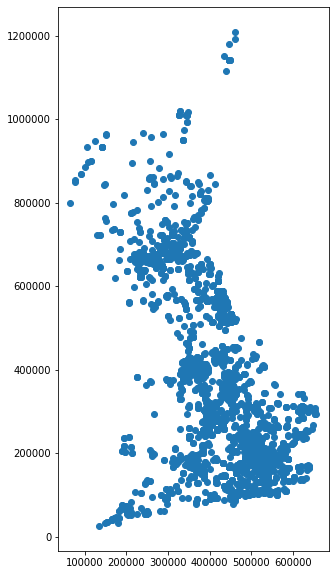

In [15]:
ccp.plot(figsize=(10,10))

## Get basemap

http://leaflet-extras.github.io/leaflet-providers/preview/index.html

https://automating-gis-processes.github.io/site/notebooks/L5/interactive-map-folium.html

In [16]:
ccp.crs
ccp_wgs84 = ccp.to_crs("EPSG:4326") #wgs84
ccp_p = ccp.to_crs("EPSG:3857") #pseudomercator

In [17]:
ccp_wgs84.plot()
mplleaflet.show(path = "../map/ccp.html") #mplleaflet uses WGS84/EPSG:4326 crs

## Datashader

## Next steps
- add grid code col when read in data, may need to identify
- try datashader/holoviews/geoviews, may ned to convert geometry to lon lat columns, in metres
- check is NI included in OS maps? doesn't look like any CPs are there

## Archive

In [28]:

# initializing list  
test_list = ['GeeksforGeeks', 'Geeky', 'Computers', 'Algorithms'] 
  
# printing original list  
print ("The original list is : " + str(test_list)) 
  
# initializing substring 
subs = 'Geek'
  
# using list comprehension  
# to get string with substring  
res = [i for i in test_list if subs in i] 
  
# printing result  
print ("All strings with given substring are : " + str(res)) 


The original list is : ['GeeksforGeeks', 'Geeky', 'Computers', 'Algorithms']
All strings with given substring are : ['GeeksforGeeks', 'Geeky']


In [29]:
res

['GeeksforGeeks', 'Geeky']